In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as pd
import numpy as np
import ipdb
from matplotlib import pyplot as plt

Dataset came already separated into test and train sets.

In [103]:
train_path = "/content/drive/MyDrive/Colab Notebooks/MNIST CSV/mnist_train.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/MNIST CSV/mnist_test.csv"

pandas dataframe + examining datasets

In [104]:
data_1 = pd.read_csv(train_path)

In [105]:
data_1.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
data_2 = pd.read_csv(test_path)

In [107]:
data_2.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


numpy dataframe array conversion, assigning rows and columns to variable names, and random shuffle  

In [108]:
train_data = np.array(data_1)
m, n = train_data.shape
np.random.shuffle(train_data)

train_data = train_data.T
Y_train_data = train_data[0]
X_train_data = train_data[1:n]
X_train_data = X_train_data /255

test_data = np.array(data_2)
d, x = test_data.shape
np.random.shuffle(test_data)

test_data = test_data.T
Y_test_data = test_data[0]
X_test_data = test_data[1:x]
X_test_data = X_test_data /255

Checking dimensions of training datasets, making sure labels and digit inputs are correctly separated

In [109]:
print(X_train_data.shape)
print("\n")
print(Y_train_data.shape)

(784, 60000)


(60000,)


In [110]:
print(train_data.shape)
print('\n')
print(pd.DataFrame(X_train_data))
print(X_train_data.shape)
print(Y_train_data.shape)
print('\n')
print(m,n)

(785, 60000)


     0      1      2      3      4      5      6      7      8      9      \
0      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
779    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
780    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
781    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
782    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
783    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...  59990  59991  59992  59993  59994  59995  59996  5

The actual Neural Network code: The meat of the operation

In [111]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10,1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10,1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

#####################################__BACKPROP__###########################################

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def deriv_ReLU(Z):
  return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  m  = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)

  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

In [112]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2  = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if (i % 50 == 0):
      print("iteration: ", i)
      print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
  return W1, b1, W2, b2

Running gradient descent, getting our final accuracy % and the corresponding weights and biases

In [113]:
W1, b1, W2, b2 = gradient_descent(X_train_data, Y_train_data, 500, 0.5)

iteration:  0
[7 0 7 ... 7 7 7] [0 1 4 ... 7 4 8]
Accuracy:  0.13135
iteration:  50
[0 1 4 ... 7 4 8] [0 1 4 ... 7 4 8]
Accuracy:  0.7691166666666667
iteration:  100
[0 1 4 ... 7 4 8] [0 1 4 ... 7 4 8]
Accuracy:  0.8407
iteration:  150
[0 1 4 ... 7 4 8] [0 1 4 ... 7 4 8]
Accuracy:  0.86415
iteration:  200
[0 1 4 ... 7 4 8] [0 1 4 ... 7 4 8]
Accuracy:  0.8821166666666667
iteration:  250
[0 1 4 ... 7 4 8] [0 1 4 ... 7 4 8]
Accuracy:  0.89105
iteration:  300
[0 1 4 ... 7 4 8] [0 1 4 ... 7 4 8]
Accuracy:  0.8965
iteration:  350
[0 1 4 ... 7 4 8] [0 1 4 ... 7 4 8]
Accuracy:  0.9009833333333334
iteration:  400
[0 1 4 ... 7 4 8] [0 1 4 ... 7 4 8]
Accuracy:  0.9041333333333333
iteration:  450
[0 1 4 ... 7 4 8] [0 1 4 ... 7 4 8]
Accuracy:  0.90775


Testing weights and biases on the original training dataset, then on the testing dataset

In [114]:
from re import X
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)
  return predictions

def test_prediction(index, W1, b1, W2, b2):
  current_image = X_train_data[:, index, None]
  prediction = make_predictions(X_train_data[:, index, None], W1, b1, W2, b2)
  label = Y_train_data[index]
  print(f"Prediction: {prediction}")
  print(f"Label: {label}")

  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation ="nearest")
  plt.show

Prediction: [1]
Label: 1


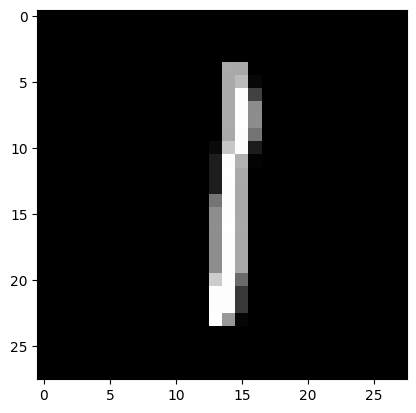

In [115]:
test_prediction(52311, W1, b1, W2, b2)

In [116]:
dev_predictions = make_predictions(X_test_data, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test_data)

[4 7 3 ... 5 7 0] [4 7 3 ... 5 7 0]


0.9086